# **EMISIONES MUNDIALES DE ÓXIDO NITROSO**
## *Principales emisores y pronósticos*
#### por Montoya Muñoz, Joseph
---
**INTRODUCCIÓN**

El óxido nitroso es un gas volátil, incoloro, con un olor dulce y ligeramente tóxico, que provoca alucinaciones y estado eufórico en la persona, por lo que ha sido comúnmente utilizado como analgésico.

Su estructura molecular es N2O, y esta formado por la unión de dos moléculas de nitrógeno y una de oxígeno. Químicamente es un gas estable, que no reacciona con otros elementos o compuestos.

Se genera por la termólisis controlada del nitrato de amónico, según la reacción, NH4NO3 -> 2 H2O + N2O o por reacción de amoníaco (NH3) con ácido nítrico (HNO3).


![](https://raw.githubusercontent.com/trevorseether/bases-de-datos/main/campo.bmp)

Las fuentes principales de su emisión son:

* Procesos llevados a cabo en agricultura intensiva.
* Quema de biomasa y combustibles fósiles.
* Uso de fertilizantes nitrogenados.
* Deforestación.

Este es emitido por las bacterias del suelo, producto de la agricultura y el uso de fertilizantes con base de nitrógeno, junto con el tratamiento de los residuos animales, aumentan la producción de óxidos nitrosos. Algunas industrias, como la del nailon, y la quema de combustible es en motores de combustión interna también liberan óxido nitroso a la atmósfera.

Lamentablemente el óxido nitroso actua como un importante gas de efecto invernadero pues tiene una permanencia media de 100 años en la atmósfera, actualmente se le atribuye el 5% del efecto invernadero artificial,por lo tanto contribuye sustancialmente al calentamiento global además de atacar la capa de ozono, reduciéndolo a oxígeno molecular y liberando dos moléculas de monóxido de nitrógeno.

Como se puede apreciar en la gráfica a continuación, la actividad que aporta casi en su totalidad a las emisiones de óxido nitroso es la actividad agrícola

![](https://raw.githubusercontent.com/trevorseether/bases-de-datos/main/origen%20emisiones.bmp)

*Fuente: Agencia de Protección Ambiental de Estados Unidos EPA*


El siguiente análisis consistirá en la comparación de la evolución de las emisiones de óxido nitroso de los conglomerados de países más importantes para encontrar diferencias y similitudes  entre ellos y sus emisiones respectivas.

# Importación de los módulos necesarios

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARIMA


In [ ]:
#Importación de la base dde datos de emisiones de Óxido Nitroso
"API_EN.ATM.NOXE.KT.CE_DS2_es_csv_v2_1496344"

df = pd.read_csv("https://raw.githubusercontent.com/trevorseether/bases-de-datos/main/API_EN.ATM.NOXE.KT.CE_DS2_es_csv_v2_1496344.csv",
                 header = 2)

df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Emisiones de óxido nitroso (miles de toneladas...,EN.ATM.NOXE.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.826198,1.826948,1.844813,1.822090,1.821157,1.829608,2.625846,2.777519,5.303201,6.067785,6.170271,7.047013,7.624574,7.290487,7.828492,8.650364,6.47466,8.943996,11.000443,11.871481,11.823462,11.862274,12.133462,12.684115,13.239976,13.292831,8.335714,38.427600,6.535978,5.815693,5.468121,5.173776,5.335968,5.007275,5.012700,5.168971,5.765411,5.727219,5.884513,6.123027,6.361541,6.425156,6.488772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afganistán,AFG,Emisiones de óxido nitroso (miles de toneladas...,EN.ATM.NOXE.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3042.256300,3006.138200,2530.158000,2674.404100,2937.318200,3153.723000,3265.633000,3268.981000,3272.918000,3214.545000,3275.026000,3256.705000,3327.323000,3188.660000,3062.152100,2862.536900,2516.90240,2677.107300,2772.044800,2771.307000,2748.196500,2755.893800,2719.013100,2766.650800,2594.427200,2735.142400,2948.806800,3177.996000,3332.996000,3600.557000,3316.566000,3058.894000,3374.660000,3337.088000,3352.371000,3411.736000,3426.120000,3470.357000,3497.234000,3341.149000,3356.556000,3390.121560,3423.687120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Emisiones de óxido nitroso (miles de toneladas...,EN.ATM.NOXE.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28392.652000,15844.224000,16758.848000,17638.938000,14997.738000,17645.913000,14751.908000,16804.108000,17304.324000,23134.711000,17712.687000,14191.366000,16174.529000,15584.475000,10110.247000,9936.771000,9368.44800,15491.723000,8688.463000,10695.651000,17723.258000,13369.556000,25484.356000,10787.504000,14052.827000,14652.460000,11602.215000,2731.974200,2858.606100,2824.695200,2996.277100,3065.841100,3152.700000,3232.060000,3063.060400,3047.591400,3409.907000,3150.716000,3283.396000,3478.789000,3569.867000,3605.565670,3641.264340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,Emisiones de óxido nitroso (miles de toneladas...,EN.ATM.NOXE.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,741.898200,756.031100,756.806100,803.647100,819.494300,818.462000,925.238400,1007.155900,1207.766200,1229.903300,1239.944200,1287.817500,1254.666100,1481.108700,1463.587500,1467.698100,1542.71500,1487.758200,1544.596700,1694.611900,1560.115300,1006.294100,1012.363900,933.592900,1069.571300,982.306300,900.894100,848.842000,930.325500,925.842900,1263.426700,927.005400,989.203800,954.862000,1029.159700,1026.211600,1075.749600,1070.383500,1109.747300,1139.560000,1123.573300,1134.809033,1146.044766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Emisiones de óxido nitroso (miles de toneladas...,EN.ATM.NOXE.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023777,0.023373,0.022969,0.022564,0.022160,0.021756,0.021352,0.020948,0.020543,0.020139,0.019735,0.019331,0.018926,0.018522,0.018118,0.017714,0.01731,0.016905,0.016501,0.016097,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Se puede ver que la información disponible es solo de 1970 al 2012, se procede a eliminar las columnas vacías**

In [ ]:
for i in range(1960, 1970):
    df = df.drop([str(i)], axis = 1)

for i in range(2013, 2021):
    df = df.drop([str(i)], axis = 1)

df = df.drop(["Unnamed: 65", "Indicator Name",
              "Indicator Code"], axis = 1)

df

,Country Name,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Aruba,ABW,1.826198,1.826948,1.844813,1.822090,1.821157,1.829608,2.625846,2.777519,5.303201,6.067785,6.170271,7.047013,7.624574,7.290487,7.828492,8.650364,6.47466,8.943996,11.000443,11.871481,11.823462,11.862274,12.133462,12.684115,13.239976,13.292831,8.335714,38.427600,6.535978,5.815693,5.468121,5.173776,5.335968,5.007275,5.012700,5.168971,5.765411,5.727219,5.884513,6.123027,6.361541,6.425156,6.488772
1,Afganistán,AFG,3042.256300,3006.138200,2530.158000,2674.404100,2937.318200,3153.723000,3265.633000,3268.981000,3272.918000,3214.545000,3275.026000,3256.705000,3327.323000,3188.660000,3062.152100,2862.536900,2516.90240,2677.107300,2772.044800,2771.307000,2748.196500,2755.893800,2719.013100,2766.650800,2594.427200,2735.142400,2948.806800,3177.996000,3332.996000,3600.557000,3316.566000,3058.894000,3374.660000,3337.088000,3352.371000,3411.736000,3426.120000,3470.357000,3497.234000,3341.149000,3356.556000,3390.121560,3423.687120
2,Angola,AGO,28392.652000,15844.224000,16758.848000,17638.938000,14997.738000,17645.913000,14751.908000,16804.108000,17304.324000,23134.711000,17712.687000,14191.366000,16174.529000,15584.475000,10110.247000,9936.771000,9368.44800,15491.723000,8688.463000,10695.651000,17723.258000,13369.556000,25484.356000,10787.504000,14052.827000,14652.460000,11602.215000,2731.974200,2858.606100,2824.695200,2996.277100,3065.841100,3152.700000,3232.060000,3063.060400,3047.591400,3409.907000,3150.716000,3283.396000,3478.789000,3569.867000,3605.565670,3641.264340
3,Albania,ALB,741.898200,756.031100,756.806100,803.647100,819.494300,818.462000,925.238400,1007.155900,1207.766200,1229.903300,1239.944200,1287.817500,1254.666100,1481.108700,1463.587500,1467.698100,1542.71500,1487.758200,1544.596700,1694.611900,1560.115300,1006.294100,1012.363900,933.592900,1069.571300,982.306300,900.894100,848.842000,930.325500,925.842900,1263.426700,927.005400,989.203800,954.862000,1029.159700,1026.211600,1075.749600,1070.383500,1109.747300,1139.560000,1123.573300,1134.809033,1146.044766
4,Andorra,AND,0.023777,0.023373,0.022969,0.022564,0.022160,0.021756,0.021352,0.020948,0.020543,0.020139,0.019735,0.019331,0.018926,0.018522,0.018118,0.017714,0.01731,0.016905,0.016501,0.016097,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693,0.015693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
260,"Yemen, Rep. del",YEM,1143.400900,1243.546400,1231.375800,1198.184100,1287.743100,1365.559300,1277.038800,1291.193400,1354.920100,1396.193500,1419.790700,1458.038500,1485.904400,1512.266800,1543.207900,1577.670600,1609.74320,1576.182600,1721.163400,1762.195000,2069.603400,1986.554400,2050.005200,2053.613600,2061.692200,2157.246600,2227.514300,2405.063700,2529.231100,2629.528500,2723.480200,2874.456400,2925.603300,3071.932600,3170.618000,3262.719000,3351.286000,3444.875000,3516.516000,3536.139000,3599.968000,3635.967680,3671.967360
261,Sudáfrica,ZAF,18200.503000,17881.513000,18229.395000,18616.213000,19064.690000,19859.437000,20129.106000,20775.549000,20928.503000,21857.635000,22286.985000,22390.525000,22220.955000,21238.689000,21174.984000,20675.636000,20612.95400,20807.076000,21400.292000,21944.838000,22884.851000,22992.235000,25287.010000,24800.744000,25000.942000,25135.203000,26850.464000,27730.523000,27903.596000,25874.336000,24036.253000,23160.441000,2401

**Existe una serie de países que aparecen en la base datos, pero no presentan información en ningún año, por lo tanto se eliminan, estos paises son ["Islas del Canal", "Curacao", "Isla de Man", "No clasificado",
              "Liechtenstein", "Isla de San Martín (parte francesa)",
              "Mónaco", "Montenegro", "Ribera Occidental y Gaza", "San Marino",
              "Serbia", "Sudán del Sur", "Sint Maarten (Dutch part)",
              "Kosovo"]**

In [ ]:
df = df.drop([36, 49, 106, 108, 135, 145, 147, 160, 
              194, 210, 212, 214, 223, 259], axis = 0)
df.reset_index(inplace = True, drop = True) # Se resetea el índice

Para el análisis, los paises y conglomerados de países más importantes deben de ser los que han generado mayores emisiones de óxido nitroso en los 10 últimos años, por lo tanto se procede a generar esa columna

In [ ]:
prom = []
for i in range(0, 251):
    prom.append(df.iloc[i, -10:-1].mean())

IndexError: ignored

**Añadidiendo la nueva columna de promedios**

In [ ]:
df["Promedio 10ult"] = prom

In [ ]:
df["Promedio 10ult"]

0          5.719535
1       3398.081396
2       3315.661386
3       1073.784004
4          0.015693
           ...     
245       39.495552
246     3398.891253
247    23194.976316
248    16360.311346
249     4612.977974
Name: Promedio 10ult, Length: 250, dtype: float64

**Ordenando de mayor a menor según los mayores emisores de óxido nitroso de los 10 últimos años de la base de datos**

In [ ]:
df = df.sort_values("Promedio 10ult", ascending = False)
df.reset_index(inplace = True, drop = True)
df.head(35)

,Country Name,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,Promedio 10ult,Pendientes
0,Mundo,WLD,2.225930e+06,2.089239e+06,2.245411e+06,2.291021e+06,2.240345e+06,2.329579e+06,2.412556e+06,2.524966e+06,2.552326e+06,2.710504e+06,2.732926e+06,2.636113e+06,2.803907e+06,2.778356e+06,2.693296e+06,2.695397e+06,2.747397e+06,2.928827e+06,2.791221e+06,2.840341e+06,2.953007e+06,2.904557e+06,3.076062e+06,2.848968e+06,2.955370e+06,2.978719e+06,3.011979e+06,3.236772e+06,3.120987e+06,2.955562e+06,2.920510e+06,2.785437e+06,2.850332e+06,2.836658e+06,2.907453e+06,2.965813e+06,3.100186e+06,3.260053e+06,3.031989e+06,3.068678e+06,3.084900e+06,3.123551e+06,3.153742e+06,3.042142e+06,20345.798308
1,BIRF y la AIF,IBT,1.380146e+06,1.231068e+06,1.355190e+06,1.370131e+06,1.303348e+06,1.391352e+06,1.433883e+06,1.535425e+06,1.550381e+06,1.660679e+06,1.702999e+06,1.634952e+06,1.841444e+06,1.807835e+06,1.700245e+06,1.692854e+06,1.762290e+06,1.951056e+06,1.810242e+06,1.830435e+06,2.010095e+06,1.958728e+06,2.141516e+06,1.922940e+06,1.970490e+06,2.004704e+06,2.028390e+06,2.244760e+06,2.160279e+06,2.000283e+06,1.963913e+06,1.975210e+06,2.033565e+06,2.021503e+06,2.089227e+06,2.169433e+06,2.324230e+06,2.469363e+06,2.287258e+06,2.322923e+06,2.367999e+06,2.398942e+06,2.437745e+06,2.272320e+06,25378.443823
2,Ingreso mediano y bajo,LMY,1.324635e+06,1.171108e+06,1.293776e+06,1.304139e+06,1.232942e+06,1.317754e+06,1.363214e+06,1.466308e+06,1.480860e+06,1.592729e+06,1.636373e+06,1.570134e+06,1.776483e+06,1.744883e+06,1.635778e+06,1.629395e+06,1.700415e+06,1.891146e+06,1.749466e+06,1.770390e+06,1.960276e+06,1.916574e+06,2.097834e+06,1.877680e+06,1.920634e+06,1.950731e+06,1.973258e+06,2.190623e+06,2.109503e+06,1.949942e+06,1.913082e+06,1.929398e+06,1.989220e+06,1.973307e+06,2.039785e+06,2.119362e+06,2.274972e+06,2.418797e+06,2.236846e+06,2.277707e+06,2.319867e+06,2.351319e+06,2.390215e+06,2.223551e+06,25948.648254
3,Ingreso mediano,MIC,1.069090e+06,9.815266e+05,1.099459e+06,1.094648e+06,1.063086e+06,1.123680e+06,1.174668e+06,1.245118e+06,1.270586e+06,1.339527e+06,1.377479e+06,1.349743e+06,1.523874e+06,1.500789e+06,1.422176e+06,1.426853e+06,1.500108e+06,1.653764e+06,1.553557e+06,1.553045e+06,1.672683e+06,1.684341e+06,1.779615e+06,1.644368e+06,1.673654e+06,1.686570e+06,1.727013e+06,1.943762e+06,1.871772e+06,1.713611e+06,1.666951e+06,1.674241e+06,1.742525e+06,1.733675e+06,1.794315e+06,1.862208e+06,1.883968e+06,1.816031e+06,1.805918e+06,1.866263e+06,1.914647e+06,1.941999e+06,1.976796e+06,1.846558e+06,21230.242984
4,Sólo BIRF,IBD,9.323035e+05,8.959605e+05,1.002618e+06,9.834674e+05,9.869937e+05,1.038041e+06,1.090101e+06,1.132403e+06,1.150696e+06,1.201348e+06,1.237829e+06,1.226575e+06,1.380608e+06,1.327847e+06,1.295717e+06,1.303681e+06,1.370323e+06,1.487067e+06,1.420750e+06,1.423484e+06,1.484770e+06,1.511588e+06,1.547452e+06,1.469464e+06,1.493428e+06,1.496475e+06,1.557807e+06,1.763616e+06,1.663858e+06,1.515138e+06,1.493103e+06,1.479082e+06,1.564514e+06,1.559089e+06,1.603858e+06,1.674575e+06,1.696245e+06,1.582721e+06,1.600918e+06,1.655130e+06,1.696432e+06,1.720082e+06,1.751592e+06,1.643228e+06,18165.478510
5,Ingreso mediano alto,UMC,6.670900e+05,6.394669e+05,7.345901e+05,7.049237e+05,7.043727e+05,7.428304e+05,7.915850e+05,8.267964e+05,8.362737e+05,8.783600e+05,9.131302e+05,9.017122e+05,1.046541e+06,9.788425e+05,9.528481e+05,9.575083e+05,1.011650e+06,1.121453e+06,1.052781e+06,1.053364e+06,1.108978e+06,1.146409e+06,1.151576e+06,1.091563e+06,1.110657e+06,1.103267e+06,1.165888e+06,1.373080e+06,1.277343e+06,1.121747e+06,1.114248e+06,1.118805e+06,1.207478e+06,1.193840e+06,1.210198e+06,1.291204e+06,1.314771e+06,1.195219e+06,1.209448e+06,1.272628e+06,1.285551e+06,1.304866e+06,1.331627e+06,1.253080e+06,15054.100496
6,avanzada del dividendo demográfico,LTE,5.476738e+05,5.319897e+05,5.930967e+05,5.917508e+05,5.9

**Ahora el cálculo de la pendiente mediante una regresión lineal nos va a indicar de una manera sencilla cuales países o conglomerados han aumentado o reducido sus emisiones progresivamente**

In [ ]:
regresion_lineal = LinearRegression()

df.iloc[249, 45]
pendientes = []
interceptos = []
for j in range(0,250):
    
    x = []
    for a in range(1970, 2013):
        x.append(a)
    
    y = []
    for i in range(2, 45):
        y.append(df.iloc[j,i]) #aqui hay valor iterable

    df_rl = pd.DataFrame({"años": x, "emisiones": y})
    
    Y = df_rl["emisiones"].values.reshape(-1,1)
    X = df_rl["años"].values.reshape(-1,1)

    
    regresion_lineal.fit(X, Y)
    prediccion = regresion_lineal.predict(X)
    
    "Y = MX +C"
    M = regresion_lineal.coef_[0][0]
    C = regresion_lineal.intercept_[0]
        
    pendientes.append(M)
    interceptos.append(C)

df["Pendientes"] = pendientes #agrega la columna de pendientes


Podemos graficar la pendiente para cualquiera de los paises
Los conglomerados que he escogido para poder tener una visión general de cómo han evolucionado las emisiones de óxido nitroso son:
* Asia oriental y el Pacífico
* Unión Europea
* América del Norte
* América Latina y el Caribe

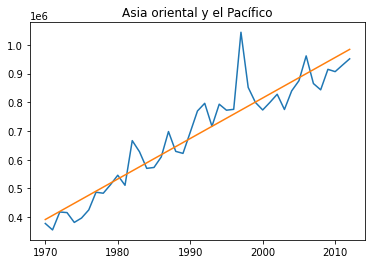

In [ ]:
def forecast(x, i): #x es el año, i es el país
    return interceptos[i] + pendientes[i]*x

z = range(1970, 2013)
plt.plot(x, df.iloc[7,2:45]) #el iterable indica el país
plt.plot(z, [forecast(i, 7) for i in z])
plt.title(df.iloc[7,0]) #el iterable indica el pais
plt.show()

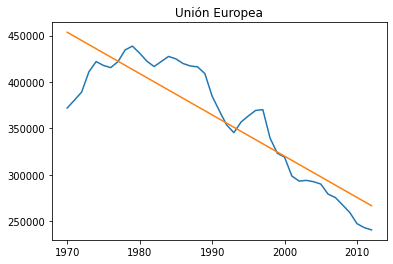

In [ ]:
plt.plot(x, df.iloc[34,2:45]) #el iterable indica el país
plt.plot(z, [forecast(i, 34) for i in z])
plt.title(df.iloc[34,0]) #el iterable indica el pais
plt.show()

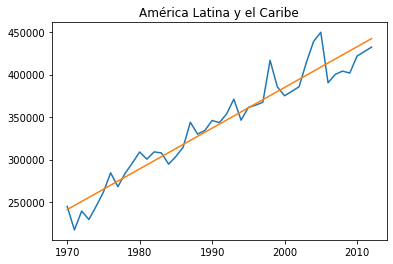

In [ ]:
plt.plot(x, df.iloc[25,2:45]) #el iterable indica el país
plt.plot(z, [forecast(i, 25) for i in z])
plt.title(df.iloc[25,0]) #el iterable indica el pais
plt.show()

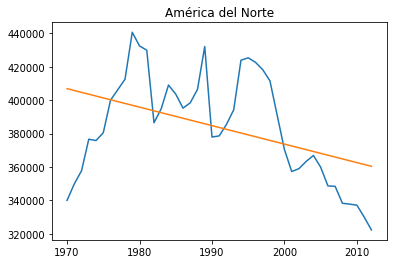

In [ ]:
plt.plot(x, df.iloc[30,2:45]) #el iterable indica el país
plt.plot(z, [forecast(i, 30) for i in z])
plt.title(df.iloc[30,0]) #el iterable indica el pais
plt.show()

# Forecasting mediante un modelo ARIMA

Creamos un nuevo DataFrame, el cual va a consistir en una transpuesta del primero

In [ ]:
df2 = df.copy()
del df2["Country Code"]
del df2["Promedio 10ult"]
del df2["Pendientes"]

df2  = df2.transpose()
df2.columns = df2.iloc[0] #asigna el nuevo nombre a las columnas
df2 = df2.drop(["Country Name"], axis = 0) # eliminar primera fila

paises = df2.columns #volviendo los valores numéricos
for i in paises:
    df2[i] = pd.to_numeric(df2[i], errors = "coerce")

df2.index = pd.to_datetime(df2.index)
df2 = df2.rename_axis(['Date'])
df2.head()

Country Name,Mundo,BIRF y la AIF,Ingreso mediano y bajo,Ingreso mediano,Sólo BIRF,Ingreso mediano alto,avanzada del dividendo demográfico,Asia oriental y el Pacífico,Miembros OCDE,inicial del dividendo demográfico,Ingreso alto,posterior al dividendo demográfico,Asia oriental y el Pacífico (excluido altos ingresos),Asia oriental y el Pacífico (BIRF y la AIF),total de la AIF,Países de ingreso mediano bajo,Sólo AIF,África al sur del Sahara (BIRF y la AIF),África al sur del Sahara,África al sur del Sahara (excluido altos ingresos),Europa y Asia central,China,Países menos desarrollados: clasificación de las Naciones Unidas,Países pobres muy endeudados (PPME),previa al dividendo demográfico,América Latina y el Caribe,América Latina y el Caribe (BIRF y la AIF),Frágiles y situaciones de conflicto afectados,América Latina y el Caribe (excluido altos ingresos),Países de ingreso bajo,América del Norte,Estados Unidos,Asia meridional,Asia meridional (BIRF y la AIF),Unión Europea,Europa y Asia central (BIRF y la AIF),India,Brasil,Zona del Euro,Europa y Asia central (excluido altos ingresos),...,Bahrein,Vanuatu,Bahamas,Nueva Caledonia,Cabo Verde,Malta,Barbados,Comoras,Samoa,Polinesia Francesa,Guinea Ecuatorial,Santa Lucía,Antigua y Barbuda,Samoa Americana,Granada,Maldivas,Tonga,Seychelles,Dominica,San Vicente y las Granadinas,Bermudas,Saint Kitts y Nevis,Islas Caimán,"Región Administrativa Especial de Macao, China",Micronesia (Estados Federados de),Gibraltar,Santo Tomé y Príncipe,Islas Vírgenes (EE.UU.),Islas Vírgenes Británicas,Islas Feroe,Aruba,Kiribati,Guam,Tuvalu,Islas Turcas y Caicos,Nauru,Mariana,Islas Marshall,Palau,Andorra
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970-01-01,2225930.2,1.380146e+06,1.324635e+06,1.069090e+06,9.323035e+05,667090.005517,547673.789597,377661.199923,8.988621e+05,419363.468380,878163.191833,872843.804895,277074.021631,272568.840901,447842.995655,402000.098382,393378.094634,414258.765318,414258.765318,414149.956713,678090.231364,139154.97,401544.095326,357852.938797,360996.064106,244931.827326,236141.095762,283480.220574,233663.728251,255544.60237,340006.534382,310995.1,112879.759224,112879.759224,371920.81856,312215.0523,84290.24,107500.25,267254.12356,254784.2663,...,13.417296,54.13871,41.18040,83.39806,18.356960,38.64057,62.86428,38.91523,18.884053,12.813974,12.272156,18.109456,10.219987,0.769178,7.575036,2.249224,7.663386,6.259365,11.979144,17.499345,5.199382,9.157524,2.119386,1.820128,5.510157,2.256338,3.762997,4.529255,4.498100,6.155949,1.826198,2.163338,4.738474,0.324291,0.070185,0.086612,0.182078,0.034138,0.018836,0.023777
1971-01-01,2089238.8,1.231068e+06,1.171108e+06,9.815266e+05,8.959605e+05,639466.855428,531989.662840,355243.981445,9.135953e+05,393807.398868,894595.054616,887667.888890,257483.189141,253650.789931,335107.345898,342059.745174,282526.824951,297752.503012,297752.503012,297641.254366,693231.014365,141874.29,278437.741620,254829.676464,250202.167708,217191.029668,208970.129210,205320.344006,206077.825893,189581.28182,349879.934407,318714.1,116117.878322,116117.878322,380407.59494,321547.8410,86999.95,89532.34,271393.11894,260759.0420,...,13.670659,59.65020,41.25976,83.24027,17.781104,39.57708,56.99970,39.50733,18.861020,12.555992,12.483638,17.901942,11.176864,0.755306,7.666827,2.110492,7.232579,6.812436,12.632562,17.532112,5.254407,8.731553,2.164556,1.826356,5.997694,2.257327,3.726014,4.886778,3.954391,5.888605,1.826948,2.277452,3.737422,0.326824,0.070375,0.091981,0.191978,0.035666,0.019115,0.023373
1972-01-01,2245410.6,1.355190e+06,1.293776e+06,1.099459e+06,1.002618e+06,734590.055598,593096.686149,417740.070009,9.477672e+05,446843.318250,927219.426558,920188.836145,305726.159093,301375.791778,352572.534087,364869.418806,297414.136065,307378.868067,307378.868067,307237.020809,741277.940720,148863.86,293654.797527,264161.373220,258705.847582,239382.042265,231423.673273,218062.152110,227967.717075,194316.32443,357768.590556,329145.6,119543.4573

In [ ]:
df2.sort_index(inplace = True)
df2.head()

Country Name,Mundo,BIRF y la AIF,Ingreso mediano y bajo,Ingreso mediano,Sólo BIRF,Ingreso mediano alto,avanzada del dividendo demográfico,Asia oriental y el Pacífico,Miembros OCDE,inicial del dividendo demográfico,Ingreso alto,posterior al dividendo demográfico,Asia oriental y el Pacífico (excluido altos ingresos),Asia oriental y el Pacífico (BIRF y la AIF),total de la AIF,Países de ingreso mediano bajo,Sólo AIF,África al sur del Sahara (BIRF y la AIF),África al sur del Sahara,África al sur del Sahara (excluido altos ingresos),Europa y Asia central,China,Países menos desarrollados: clasificación de las Naciones Unidas,Países pobres muy endeudados (PPME),previa al dividendo demográfico,América Latina y el Caribe,América Latina y el Caribe (BIRF y la AIF),Frágiles y situaciones de conflicto afectados,América Latina y el Caribe (excluido altos ingresos),Países de ingreso bajo,América del Norte,Estados Unidos,Asia meridional,Asia meridional (BIRF y la AIF),Unión Europea,Europa y Asia central (BIRF y la AIF),India,Brasil,Zona del Euro,Europa y Asia central (excluido altos ingresos),...,Bahrein,Vanuatu,Bahamas,Nueva Caledonia,Cabo Verde,Malta,Barbados,Comoras,Samoa,Polinesia Francesa,Guinea Ecuatorial,Santa Lucía,Antigua y Barbuda,Samoa Americana,Granada,Maldivas,Tonga,Seychelles,Dominica,San Vicente y las Granadinas,Bermudas,Saint Kitts y Nevis,Islas Caimán,"Región Administrativa Especial de Macao, China",Micronesia (Estados Federados de),Gibraltar,Santo Tomé y Príncipe,Islas Vírgenes (EE.UU.),Islas Vírgenes Británicas,Islas Feroe,Aruba,Kiribati,Guam,Tuvalu,Islas Turcas y Caicos,Nauru,Mariana,Islas Marshall,Palau,Andorra
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970-01-01,2225930.2,1.380146e+06,1.324635e+06,1.069090e+06,9.323035e+05,667090.005517,547673.789597,377661.199923,8.988621e+05,419363.468380,878163.191833,872843.804895,277074.021631,272568.840901,447842.995655,402000.098382,393378.094634,414258.765318,414258.765318,414149.956713,678090.231364,139154.97,401544.095326,357852.938797,360996.064106,244931.827326,236141.095762,283480.220574,233663.728251,255544.60237,340006.534382,310995.1,112879.759224,112879.759224,371920.81856,312215.0523,84290.24,107500.25,267254.12356,254784.2663,...,13.417296,54.13871,41.18040,83.39806,18.356960,38.64057,62.86428,38.91523,18.884053,12.813974,12.272156,18.109456,10.219987,0.769178,7.575036,2.249224,7.663386,6.259365,11.979144,17.499345,5.199382,9.157524,2.119386,1.820128,5.510157,2.256338,3.762997,4.529255,4.498100,6.155949,1.826198,2.163338,4.738474,0.324291,0.070185,0.086612,0.182078,0.034138,0.018836,0.023777
1971-01-01,2089238.8,1.231068e+06,1.171108e+06,9.815266e+05,8.959605e+05,639466.855428,531989.662840,355243.981445,9.135953e+05,393807.398868,894595.054616,887667.888890,257483.189141,253650.789931,335107.345898,342059.745174,282526.824951,297752.503012,297752.503012,297641.254366,693231.014365,141874.29,278437.741620,254829.676464,250202.167708,217191.029668,208970.129210,205320.344006,206077.825893,189581.28182,349879.934407,318714.1,116117.878322,116117.878322,380407.59494,321547.8410,86999.95,89532.34,271393.11894,260759.0420,...,13.670659,59.65020,41.25976,83.24027,17.781104,39.57708,56.99970,39.50733,18.861020,12.555992,12.483638,17.901942,11.176864,0.755306,7.666827,2.110492,7.232579,6.812436,12.632562,17.532112,5.254407,8.731553,2.164556,1.826356,5.997694,2.257327,3.726014,4.886778,3.954391,5.888605,1.826948,2.277452,3.737422,0.326824,0.070375,0.091981,0.191978,0.035666,0.019115,0.023373
1972-01-01,2245410.6,1.355190e+06,1.293776e+06,1.099459e+06,1.002618e+06,734590.055598,593096.686149,417740.070009,9.477672e+05,446843.318250,927219.426558,920188.836145,305726.159093,301375.791778,352572.534087,364869.418806,297414.136065,307378.868067,307378.868067,307237.020809,741277.940720,148863.86,293654.797527,264161.373220,258705.847582,239382.042265,231423.673273,218062.152110,227967.717075,194316.32443,357768.590556,329145.6,119543.4573

#Predicciones para el Mundo

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


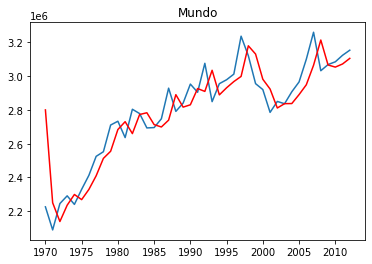

In [ ]:
mod = ARIMA(df2["Mundo"], order = (2,0,1))
res = mod.fit()


plt.plot(df2["Mundo"])
plt.title("Mundo")
plt.plot((res.fittedvalues), color="red")


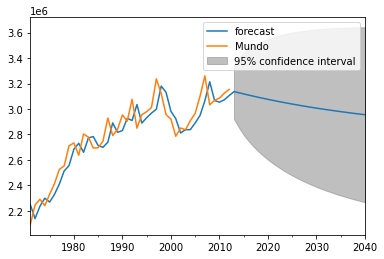

In [ ]:
res.plot_predict(1, 70)
plt.show()

Se puede apreciar una disminución en la pendiente a partir de los años 80, esto obedecería a la modernización de las técnicas agrícolas y la disminución del capital físico en esta.
> Así pues, la agricultura norteamericana se encuentra sobredimensionada en los años 80 como consecuencua de un exceso de capital físico y no de trabajo, tida vez que la población activa agraria de os EE.UU. no representa más que el 3% de la población activa total. — Barceló y García Álvarez-Coque, 1987

#Predicciones para Asia oriental y el Pacífico

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


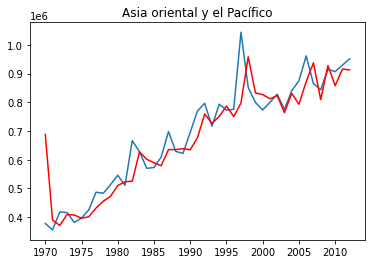

In [ ]:
mod = ARIMA(df2["Asia oriental y el Pacífico"], order = (5,0,2))
res = mod.fit()


plt.plot(df2["Asia oriental y el Pacífico"])
plt.title("Asia oriental y el Pacífico")
plt.plot((res.fittedvalues), color="red")
plt.show()

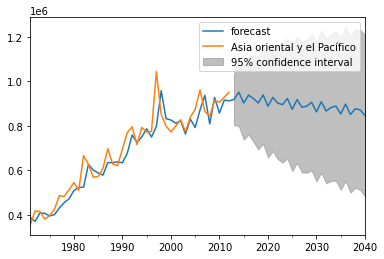

In [ ]:
res.plot_predict(1, 70)
plt.show()

#Predicciones para la Unión Europea

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


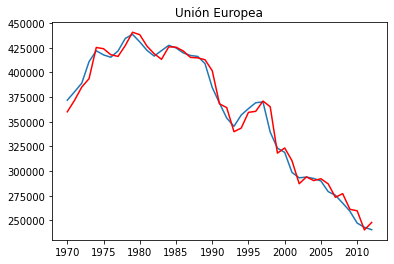

In [ ]:
mod = ARIMA(df2["Unión Europea"], order = (4,0,2))
res = mod.fit()

plt.plot(df2["Unión Europea"])
plt.title("Unión Europea")
plt.plot((res.fittedvalues), color="red")
plt.show()

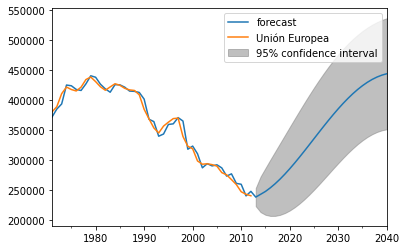

In [ ]:
res.plot_predict(1, 70)
plt.show()

Evidentemente esta predicción es errónea, y es producto de la estructura del mismo modelo, la Unión Europea está reduciendo sus emisiones de óxido nitroso debido a la aplicación de tecnicas más modernas en la agricultura, así como la reducción de la participación de la agricultura en su producto bruto interno, pues cada vez más la inversión se centra en manufactura de alta tecnología y fuentes de energía renovables.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


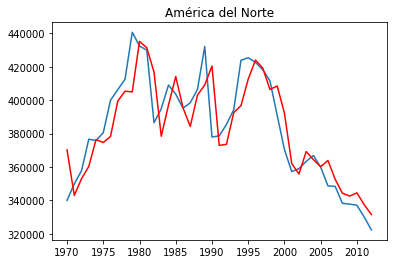

In [ ]:
mod = ARIMA(df2["América del Norte"], order = (5,0,2))
res = mod.fit()


plt.plot(df2["América del Norte"])
plt.title("América del Norte")
plt.plot((res.fittedvalues), color="red")

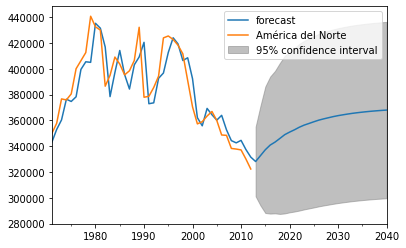

In [ ]:
res.plot_predict(1, 70)
plt.show()

#Predicciones para América Latina y el Caribe

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


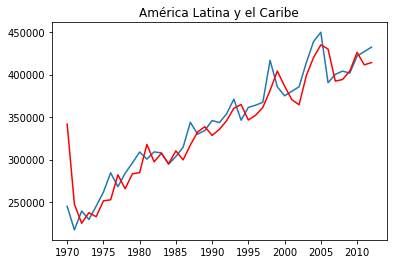

In [ ]:
mod = ARIMA(df2["América Latina y el Caribe"], order = (5,0,4))
res = mod.fit()

plt.plot(df2["América Latina y el Caribe"])
plt.title("América Latina y el Caribe")
plt.plot((res.fittedvalues), color="red")

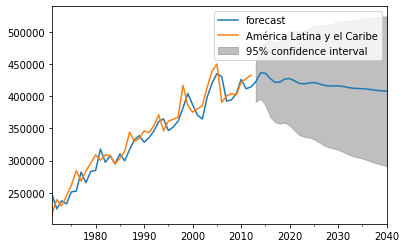

In [ ]:
res.plot_predict(1, 70)
plt.show()

#Conclusiones

* Podemos ver 2 tendencias completamente opuestas, para el caso de Asia y Latinoamérica, el crecimiento de las emisiones de óxido nitroso siguen en aumento y no hay evidencia de que se estarían disminuyendo, esto se debería a la importante contribución que hace la agricultura a la producción nacional de los paises que lo conforman, no son tan desarrollados y otras industrias más modernas aún son muy incipientes.

![](https://raw.githubusercontent.com/trevorseether/bases-de-datos/main/comparación%201.png)

* En cambio para el conjunto de paises en zonas más desarrolladas como es el caso de Norte América o Europa la tendencia ha sido al decenso de estas emisiones, esto se debe a que la producción agrícola por medios tradicionales es cada vez menor, pues se emplean técnicas modernas que no generan este impacto, como la utilización de semillas modificadas geneticamente o fertilizantes que no generan estos residuos. Y lo más importante es que la agricultura no es una actividad central de su economía, los capitales están invertidos en industria manufacturera que no genera estas emisiones en específico.

![](https://raw.githubusercontent.com/trevorseether/bases-de-datos/main/comparación%202.png)